                                          Introduction to statistics in python

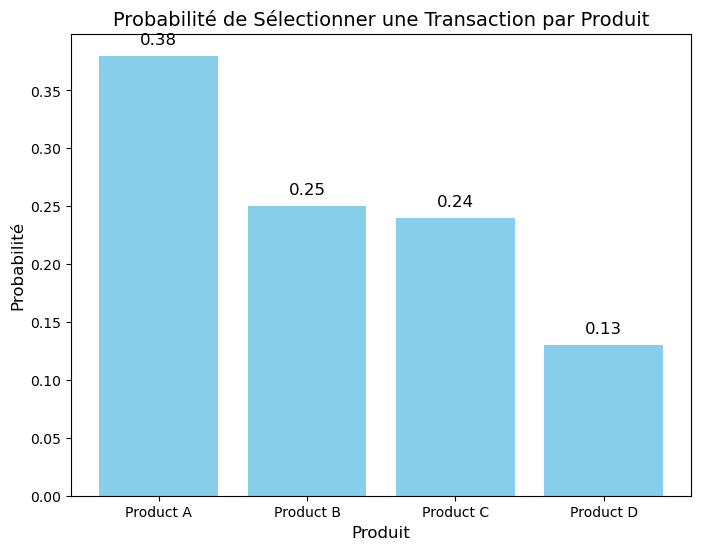

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Création d'une base de données  avec des transactions de produits
data = {
    'product': np.random.choice(['Product A', 'Product B', 'Product C', 'Product D'], size=100, p=[0.4, 0.3, 0.2, 0.1]),
    'deal_value': np.random.randint(500, 5000, size=100),
    'client': np.random.choice(['Client X', 'Client Y', 'Client Z'], size=100)
}

# Convertir en DataFrame
amir_deals = pd.DataFrame(data)

# Compter le nombre de transactions pour chaque produit
counts = amir_deals['product'].value_counts()

# Calculer la probabilité de sélectionner une transaction avec chaque produit
probs = counts / amir_deals.shape[0]

# Créer un graphique en barres pour visualiser les probabilités
plt.figure(figsize=(8, 6))
plt.bar(probs.index, probs, color='skyblue')

# Ajouter des titres et des labels
plt.title('Probabilité de Sélectionner une Transaction par Produit', fontsize=14)
plt.xlabel('Produit', fontsize=12)
plt.ylabel('Probabilité', fontsize=12)

# Afficher les valeurs de probabilité au-dessus des barres
for i, v in enumerate(probs):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontsize=12)

# Afficher le graphique
plt.show()


In [15]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

      product  deal_value    client
26  Product A        4329  Client Z
31  Product D        4890  Client X
37  Product D        4030  Client Z
86  Product A        3863  Client Z
76  Product A        3022  Client X


In [17]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

      product  deal_value    client
34  Product A        3239  Client Z
3   Product B        3060  Client Y
64  Product B        1910  Client X
87  Product B        2877  Client X
17  Product A         612  Client Z


In [25]:
import pandas as pd
import numpy as np

# Créer un DataFrame fictif représentant des groupes dans un restaurant
data = {
    'group_size': np.random.choice([2, 3, 4, 5, 6], size=100, p=[0.2, 0.3, 0.25, 0.15, 0.1]),
    'bill_amount': np.random.randint(20, 200, size=100)
}

# Convertir en DataFrame
restaurant_groups = pd.DataFrame(data)

# Calculer la distribution de probabilités pour la taille des groupes
size_dist = restaurant_groups['group_size'].value_counts(normalize=True).sort_index()

# Réinitialiser l'index et renommer les colonnes
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Afficher la distribution des probabilités
print("Distribution des probabilités par taille de groupe:")
print(size_dist)

# Calculer la valeur attendue (Expected Value)
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(f"\nValeur attendue (taille moyenne des groupes) : {expected_value:.2f}")

# Filtrer les groupes de taille 4 ou plus
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Somme des probabilités des groupes de taille 4 ou plus
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(f"\nProbabilité qu'un groupe ait 4 personnes ou plus : {prob_4_or_more:.2f}")


Distribution des probabilités par taille de groupe:
   group_size  prob
0           2  0.18
1           3  0.31
2           4  0.28
3           5  0.09
4           6  0.14

Valeur attendue (taille moyenne des groupes) : 3.70

Probabilité qu'un groupe ait 4 personnes ou plus : 0.51


                                  ---La distribution uniforme 

In [27]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

0.16666666666666666


In [29]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

0.8333333333333334


In [31]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.3333333333333333


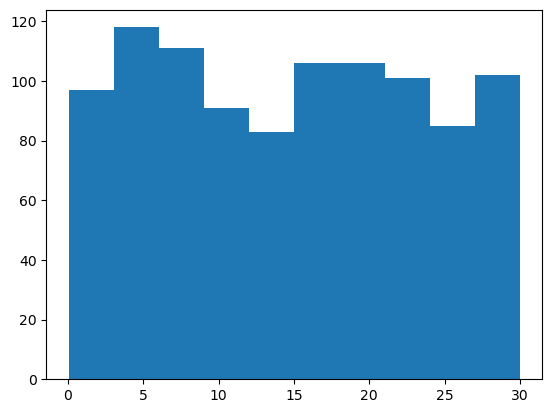

In [33]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

                      --- La distribution binomiale

In [35]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

0.8269230769230769


In [37]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

0.026999999999999996


In [39]:
# Expected number won with 30% win rate
won_30pct = 3* 0.30
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3*0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3*0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


                            --- La distribution normale 

In [47]:
from scipy.stats import norm

# Moyenne et écart-type pour la distribution normale
mean = 5000
std_dev = 2000

# Calculer la valeur en dessous de laquelle 25% des transactions seront
pct_25 = norm.ppf(0.25, loc=mean, scale=std_dev)

# Afficher le résultat
print(f"La valeur en dessous de laquelle 25% des transactions seront est : {pct_25:.2f}")


La valeur en dessous de laquelle 25% des transactions seront est : 3651.02


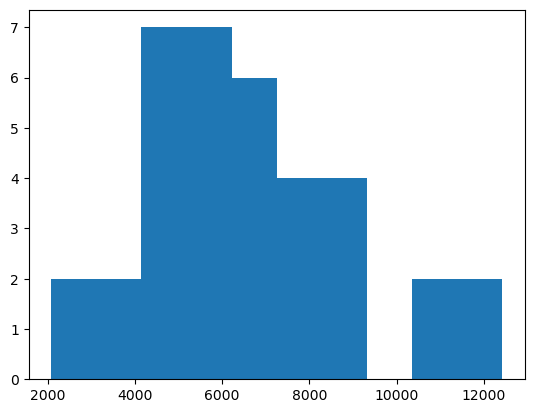

In [49]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

                            --- Théorème du central limite

In [57]:
import pandas as pd
import numpy as np

# Créer un DataFrame fictif avec des données aléatoires
np.random.seed(104)  # Fixer la graine pour la reproductibilité

# Création d'un DataFrame avec 100 transactions et une colonne 'num_users'
amir_deals = pd.DataFrame({
    'num_users': np.random.randint(1, 101, size=100)  # Nombre d'utilisateurs entre 1 et 100
})

# Afficher un aperçu des premières lignes du DataFrame
print("Aperçu des données :")
print(amir_deals.head())

# Échantillonner 20 utilisateurs avec remplacement et calculer la moyenne
samp_20 = amir_deals['num_users'].sample(20, replace=True)
mean_samp_20 = np.mean(samp_20)
print(f"\nMoyenne d'un échantillon de 20 utilisateurs : {mean_samp_20:.2f}")

# Liste pour stocker les moyennes des échantillons
sample_means = []

# Répéter le processus 100 fois
for i in range(100):
    # Prendre un échantillon de 20 utilisateurs avec remplacement
    samp_20 = amir_deals['num_users'].sample(20, replace=True)
    # Calculer la moyenne de cet échantillon
    samp_20_mean = np.mean(samp_20)
    # Ajouter la moyenne à la liste des moyennes d'échantillons
    sample_means.append(samp_20_mean)

# Afficher les moyennes des échantillons
print("\nMoyennes des échantillons :")
print(sample_means)


Aperçu des données :
   num_users
0         70
1         66
2         90
3         15
4         39

Moyenne d'un échantillon de 20 utilisateurs : 39.40

Moyennes des échantillons :
[73.35, 72.25, 47.8, 64.05, 53.95, 51.0, 51.45, 62.55, 51.9, 55.75, 56.9, 57.85, 46.75, 56.9, 45.9, 48.5, 55.9, 56.05, 57.55, 50.65, 51.45, 48.2, 62.4, 50.35, 49.4, 52.45, 56.8, 47.6, 68.6, 56.45, 52.05, 53.0, 53.5, 46.75, 57.15, 51.5, 48.8, 48.05, 43.0, 32.5, 59.8, 61.55, 57.9, 62.95, 43.25, 57.05, 54.25, 53.0, 51.7, 48.35, 53.05, 55.65, 58.7, 55.15, 50.45, 56.9, 48.35, 38.65, 40.5, 51.5, 43.75, 49.1, 54.65, 43.55, 52.4, 52.45, 46.9, 54.95, 57.6, 58.35, 48.85, 57.4, 41.35, 48.5, 50.75, 56.8, 56.6, 49.85, 44.5, 56.1, 53.0, 44.25, 53.05, 57.85, 44.1, 66.7, 49.6, 53.55, 51.8, 51.15, 54.65, 51.8, 50.4, 50.3, 53.6, 59.45, 44.4, 50.85, 41.3, 43.35]


                           --- La distribution Poisson

In [59]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)

0.1562934518505317


In [61]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)

0.23810330555354436


In [63]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)

0.0028397661205137315


                               --- La distibution exponentielle

In [65]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

0.3296799539643607


In [67]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

0.20189651799465536


In [69]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.09929769391754684


                                           --- Corrélation 

Aperçu des données :
    life_exp  happiness_score
0  69.908934         4.166031
1  69.290332         7.339811
2  68.960451         6.225440
3  76.637833         3.063011
4  74.812060         7.733437


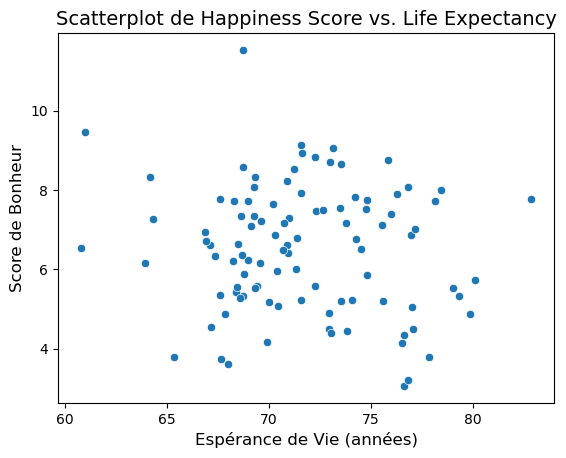

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fixer la graine pour la reproductibilité
np.random.seed(104)

# Créer un DataFrame fictif avec des données aléatoires
data = {
    'life_exp': np.random.normal(loc=72, scale=5, size=100),  # Espérance de vie autour de 72 ans avec un écart-type de 5 ans
    'happiness_score': np.random.normal(loc=6.5, scale=1.5, size=100)  # Score de bonheur autour de 6.5 avec un écart-type de 1.5
}

world_happiness = pd.DataFrame(data)

# Afficher un aperçu des premières lignes du DataFrame
print("Aperçu des données :")
print(world_happiness.head())

# Créer un scatterplot de happiness_score vs. life_exp
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)

# Ajouter des titres et des labels
plt.title('Scatterplot de Happiness Score vs. Life Expectancy', fontsize=14)
plt.xlabel('Espérance de Vie (années)', fontsize=12)
plt.ylabel('Score de Bonheur', fontsize=12)

# Afficher le plot
plt.show()


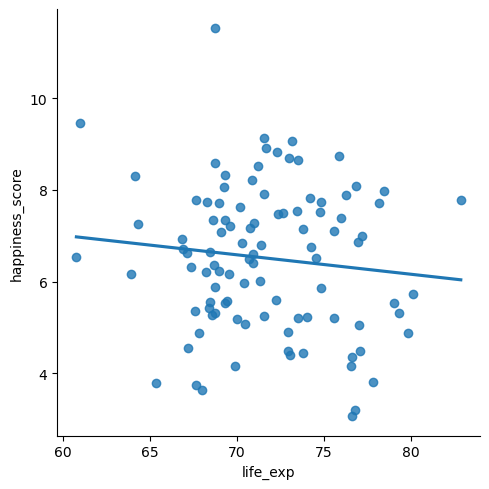

In [75]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

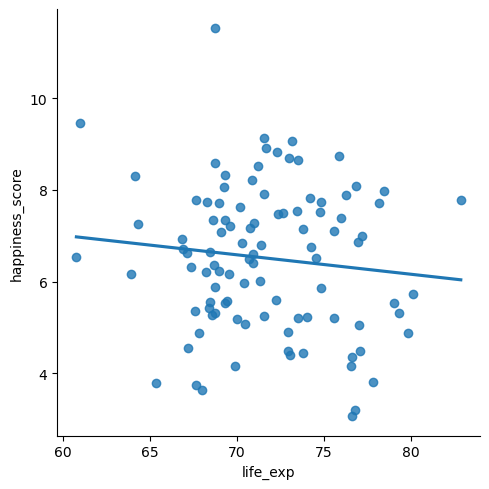

-0.11207211933292091


In [82]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

Aperçu des données :
    gdp_per_cap   life_exp
0  26654.294149  64.220103
1  25664.531087  74.799371
2  25136.720816  71.084798
3  37420.533021  60.543369
4  34499.296437  76.111457


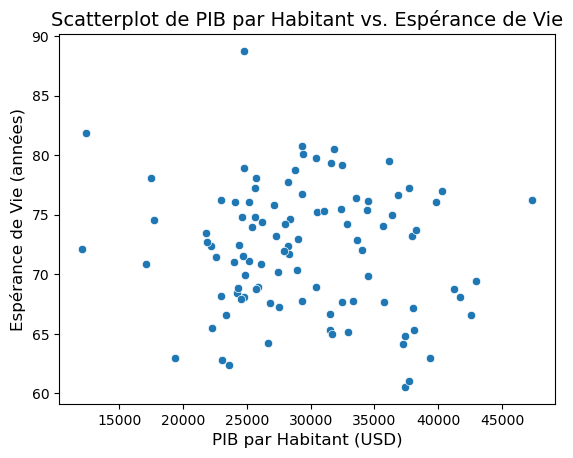

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fixer la graine pour la reproductibilité
np.random.seed(104)

# Créer un DataFrame fictif avec des données aléatoires
data = {
    'gdp_per_cap': np.random.normal(loc=30000, scale=8000, size=100),  # PIB par habitant autour de 30,000 avec un écart-type de 8,000
    'life_exp': np.random.normal(loc=72, scale=5, size=100)  # Espérance de vie autour de 72 ans avec un écart-type de 5 ans
}

world_happiness = pd.DataFrame(data)

# Afficher un aperçu des premières lignes du DataFrame
print("Aperçu des données :")
print(world_happiness.head())

# Créer un scatterplot de gdp_per_cap vs. life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Ajouter des titres et des labels
plt.title('Scatterplot de PIB par Habitant vs. Espérance de Vie', fontsize=14)
plt.xlabel('PIB par Habitant (USD)', fontsize=12)
plt.ylabel('Espérance de Vie (années)', fontsize=12)

# Afficher le plot
plt.show()


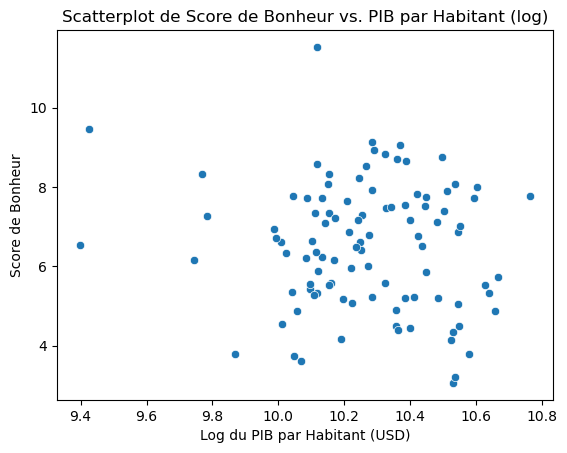

Corrélation entre Log du PIB par Habitant et Score de Bonheur : -0.11


In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fixer la graine pour la reproductibilité
np.random.seed(104)

# Créer un DataFrame fictif avec des données aléatoires
data = {
    'gdp_per_cap': np.random.normal(loc=30000, scale=8000, size=100),  # PIB par habitant autour de 30,000 avec un écart-type de 8,000
    'happiness_score': np.random.normal(loc=6.5, scale=1.5, size=100),  # Score de bonheur autour de 6.5 avec un écart-type de 1.5
    'life_exp': np.random.normal(loc=72, scale=5, size=100)  # Espérance de vie autour de 72 ans avec un écart-type de 5 ans
}

world_happiness = pd.DataFrame(data)

# Créer la colonne log_gdp_per_cap
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Créer un scatterplot de happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.title('Scatterplot de Score de Bonheur vs. PIB par Habitant (log)')
plt.xlabel('Log du PIB par Habitant (USD)')
plt.ylabel('Score de Bonheur')
plt.show()

# Calculer la corrélation entre log_gdp_per_cap et happiness_score
correlation = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(f"Corrélation entre Log du PIB par Habitant et Score de Bonheur : {correlation:.2f}")
